<a href="https://colab.research.google.com/github/err400/summer-of-code-2024/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d rohitsahoo/sales-forecasting

Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 69.2MB/s]


In [ ]:
! unzip sales-forecasting.zip

Archive:  sales-forecasting.zip
  inflating: train.csv               


In [ ]:
import pandas as pd

In [ ]:
td = pd.read_csv("train.csv")

In [ ]:
td

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


EDA

In [ ]:
td.dropna(axis=0,inplace=True)

In [ ]:
td.shape

(9789, 18)

In [ ]:
td['PID-type']=td['Product ID'].str[:3]

In [ ]:
td['PID-type'].unique()

array(['FUR', 'OFF', 'TEC'], dtype=object)

In [ ]:
one_hot = pd.get_dummies(td['PID-type'])
td = td.drop('PID-type',axis = 1)
td = td.join(one_hot)
td

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,FUR,OFF,TEC
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,True,False,False
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,True,False,False
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,True,False
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,True,False,False
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,True,False
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,True,False
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,False,False,True
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,False,False,True


In [ ]:
td['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
one_hot = pd.get_dummies(td['Ship Mode'])
td = td.drop('Ship Mode',axis = 1)
td = td.join(one_hot)
td

,Row ID,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,FUR,OFF,TEC,First Class,Same Day,Second Class,Standard Class
0,1,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,True,False,False,False,False,True,False
1,2,CA-2017-152156,08/11/2017,11/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,True,False,False,False,False,True,False
2,3,CA-2017-138688,12/06/2017,16/06/2017,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False,True,False,False,False,True,False
3,4,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,True,False,False,False,False,False,True
4,5,US-2016-108966,11/10/2016,18/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,...,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,False,True,False,False,False,False,True
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,False,True,False,False,False,False,True
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,Phones,GE 30524EE4,235.1880,False,False,True,False,False,False,True
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,False,False,True,False,False,False,True


In [ ]:
td.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Customer ID        object
Customer Name      object
Segment            object
Country            object
City               object
State              object
Postal Code       float64
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
FUR                  bool
OFF                  bool
TEC                  bool
First Class          bool
Same Day             bool
Second Class         bool
Standard Class       bool
dtype: object

dropped customer name and country fields


In [ ]:
td = td.drop(columns = ['Customer Name','Country','Row ID','Product Name','Customer ID'])

In [ ]:
td

,Order ID,Order Date,Ship Date,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,FUR,OFF,TEC,First Class,Same Day,Second Class,Standard Class
0,CA-2017-152156,08/11/2017,11/11/2017,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,True,False,False,False,False,True,False
1,CA-2017-152156,08/11/2017,11/11/2017,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400,True,False,False,False,False,True,False
2,CA-2017-138688,12/06/2017,16/06/2017,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,False,True,False,False,False,True,False
3,US-2016-108966,11/10/2016,18/10/2016,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775,True,False,False,False,False,False,True
4,US-2016-108966,11/10/2016,18/10/2016,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Corporate,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,3.7980,False,True,False,False,False,False,True
9796,CA-2016-128608,12/01/2016,17/01/2016,Corporate,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,10.3680,False,True,False,False,False,False,True
9797,CA-2016-128608,12/01/2016,17/01/2016,Corporate,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,235.1880,False,False,True,False,False,False,True
9798,CA-2016-128608,12/01/2016,17/01/2016,Corporate,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,26.3760,False,False,True,False,False,False,True


In [ ]:
one_hot = pd.get_dummies(td['Category'])
td = td.drop('Category',axis = 1)
td = td.join(one_hot)
td

,Order ID,Order Date,Ship Date,Segment,City,State,Postal Code,Region,Product ID,Sub-Category,...,FUR,OFF,TEC,First Class,Same Day,Second Class,Standard Class,Furniture,Office Supplies,Technology
0,CA-2017-152156,08/11/2017,11/11/2017,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Bookcases,...,True,False,False,False,False,True,False,True,False,False
1,CA-2017-152156,08/11/2017,11/11/2017,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Chairs,...,True,False,False,False,False,True,False,True,False,False
2,CA-2017-138688,12/06/2017,16/06/2017,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Labels,...,False,True,False,False,False,True,False,False,True,False
3,US-2016-108966,11/10/2016,18/10/2016,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Tables,...,True,False,False,False,False,False,True,True,False,False
4,US-2016-108966,11/10/2016,18/10/2016,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Storage,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Corporate,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Binders,...,False,True,False,False,False,False,True,False,True,False
9796,CA-2016-128608,12/01/2016,17/01/2016,Corporate,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Art,...,False,True,False,False,False,False,True,False,True,False
9797,CA-2016-128608,12/01/2016,17/01/2016,Corporate,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Phones,...,False,False,True,False,False,False,True,False,False,True
9798,CA-2016-128608,12/01/2016,17/01/2016,Corporate,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Phones,...,False,False,True,False,False,False,True,False,False,True


In [ ]:
td = td.drop(columns = ['Product ID'])
td

,Order ID,Order Date,Ship Date,Segment,City,State,Postal Code,Region,Sub-Category,Sales,FUR,OFF,TEC,First Class,Same Day,Second Class,Standard Class,Furniture,Office Supplies,Technology
0,CA-2017-152156,08/11/2017,11/11/2017,Consumer,Henderson,Kentucky,42420.0,South,Bookcases,261.9600,True,False,False,False,False,True,False,True,False,False
1,CA-2017-152156,08/11/2017,11/11/2017,Consumer,Henderson,Kentucky,42420.0,South,Chairs,731.9400,True,False,False,False,False,True,False,True,False,False
2,CA-2017-138688,12/06/2017,16/06/2017,Corporate,Los Angeles,California,90036.0,West,Labels,14.6200,False,True,False,False,False,True,False,False,True,False
3,US-2016-108966,11/10/2016,18/10/2016,Consumer,Fort Lauderdale,Florida,33311.0,South,Tables,957.5775,True,False,False,False,False,False,True,True,False,False
4,US-2016-108966,11/10/2016,18/10/2016,Consumer,Fort Lauderdale,Florida,33311.0,South,Storage,22.3680,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Corporate,Chicago,Illinois,60610.0,Central,Binders,3.7980,False,True,False,False,False,False,True,False,True,False
9796,CA-2016-128608,12/01/2016,17/01/2016,Corporate,Toledo,Ohio,43615.0,East,Art,10.3680,False,True,False,False,False,False,True,False,True,False
9797,CA-2016-128608,12/01/2016,17/01/2016,Corporate,Toledo,Ohio,43615.0,East,Phones,235.1880,False,False,True,False,False,False,True,False,False,True
9798,CA-2016-128608,12/01/2016,17/01/2016,Corporate,Toledo,Ohio,43615.0,East,Phones,26.3760,False,False,True,False,False,False,True,False,False,True


In [ ]:
one_hot = pd.get_dummies(td['Region'])
td = td.drop('Region',axis = 1)
td = td.join(one_hot)
td

,Order ID,Order Date,Ship Date,Segment,City,State,Postal Code,Sub-Category,Sales,FUR,...,Same Day,Second Class,Standard Class,Furniture,Office Supplies,Technology,Central,East,South,West
0,CA-2017-152156,08/11/2017,11/11/2017,Consumer,Henderson,Kentucky,42420.0,Bookcases,261.9600,True,...,False,True,False,True,False,False,False,False,True,False
1,CA-2017-152156,08/11/2017,11/11/2017,Consumer,Henderson,Kentucky,42420.0,Chairs,731.9400,True,...,False,True,False,True,False,False,False,False,True,False
2,CA-2017-138688,12/06/2017,16/06/2017,Corporate,Los Angeles,California,90036.0,Labels,14.6200,False,...,False,True,False,False,True,False,False,False,False,True
3,US-2016-108966,11/10/2016,18/10/2016,Consumer,Fort Lauderdale,Florida,33311.0,Tables,957.5775,True,...,False,False,True,True,False,False,False,False,True,False
4,US-2016-108966,11/10/2016,18/10/2016,Consumer,Fort Lauderdale,Florida,33311.0,Storage,22.3680,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Corporate,Chicago,Illinois,60610.0,Binders,3.7980,False,...,False,False,True,False,True,False,True,False,False,False
9796,CA-2016-128608,12/01/2016,17/01/2016,Corporate,Toledo,Ohio,43615.0,Art,10.3680,False,...,False,False,True,False,True,False,False,True,False,False
9797,CA-2016-128608,12/01/2016,17/01/2016,Corporate,Toledo,Ohio,43615.0,Phones,235.1880,False,...,False,False,True,False,False,True,False,True,False,False
9798,CA-2016-128608,12/01/2016,17/01/2016,Corporate,Toledo,Ohio,43615.0,Phones,26.3760,False,...,False,False,True,False,False,True,False,True,False,False


In [ ]:
one_hot = pd.get_dummies(td['Segment'])
td = td.drop('Segment',axis = 1)
td = td.join(one_hot)
td

,Order ID,Order Date,Ship Date,City,State,Postal Code,Sub-Category,Sales,FUR,OFF,...,Furniture,Office Supplies,Technology,Central,East,South,West,Consumer,Corporate,Home Office
0,CA-2017-152156,08/11/2017,11/11/2017,Henderson,Kentucky,42420.0,Bookcases,261.9600,True,False,...,True,False,False,False,False,True,False,True,False,False
1,CA-2017-152156,08/11/2017,11/11/2017,Henderson,Kentucky,42420.0,Chairs,731.9400,True,False,...,True,False,False,False,False,True,False,True,False,False
2,CA-2017-138688,12/06/2017,16/06/2017,Los Angeles,California,90036.0,Labels,14.6200,False,True,...,False,True,False,False,False,False,True,False,True,False
3,US-2016-108966,11/10/2016,18/10/2016,Fort Lauderdale,Florida,33311.0,Tables,957.5775,True,False,...,True,False,False,False,False,True,False,True,False,False
4,US-2016-108966,11/10/2016,18/10/2016,Fort Lauderdale,Florida,33311.0,Storage,22.3680,False,True,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Chicago,Illinois,60610.0,Binders,3.7980,False,True,...,False,True,False,True,False,False,False,False,True,False
9796,CA-2016-128608,12/01/2016,17/01/2016,Toledo,Ohio,43615.0,Art,10.3680,False,True,...,False,True,False,False,True,False,False,False,True,False
9797,CA-2016-128608,12/01/2016,17/01/2016,Toledo,Ohio,43615.0,Phones,235.1880,False,False,...,False,False,True,False,True,False,False,False,True,False
9798,CA-2016-128608,12/01/2016,17/01/2016,Toledo,Ohio,43615.0,Phones,26.3760,False,False,...,False,False,True,False,True,False,False,False,True,False


In [ ]:
td.dtypes

Order ID            object
Order Date          object
Ship Date           object
City                object
State               object
Postal Code        float64
Sub-Category        object
Sales              float64
FUR                   bool
OFF                   bool
TEC                   bool
First Class           bool
Same Day              bool
Second Class          bool
Standard Class        bool
Furniture             bool
Office Supplies       bool
Technology            bool
Central               bool
East                  bool
South                 bool
West                  bool
Consumer              bool
Corporate             bool
Home Office           bool
dtype: object

In [ ]:
len(td['State'].unique())

48

In [ ]:
td = td.drop(columns = ['City','Postal Code'])

In [ ]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         9789 non-null   object 
 1   Order Date       9789 non-null   object 
 2   Ship Date        9789 non-null   object 
 3   State            9789 non-null   object 
 4   Sub-Category     9789 non-null   object 
 5   Sales            9789 non-null   float64
 6   FUR              9789 non-null   bool   
 7   OFF              9789 non-null   bool   
 8   TEC              9789 non-null   bool   
 9   First Class      9789 non-null   bool   
 10  Same Day         9789 non-null   bool   
 11  Second Class     9789 non-null   bool   
 12  Standard Class   9789 non-null   bool   
 13  Furniture        9789 non-null   bool   
 14  Office Supplies  9789 non-null   bool   
 15  Technology       9789 non-null   bool   
 16  Central          9789 non-null   bool   
 17  East             97

In [ ]:
td['OrderId-type'] = td['Order ID'].str[:2]

In [ ]:
len(td['OrderId-type'].unique())

2

In [ ]:
one_hot = pd.get_dummies(td['OrderId-type'])
td = td.drop('OrderId-type',axis = 1)
td = td.join(one_hot)
td

,Order ID,Order Date,Ship Date,State,Sub-Category,Sales,FUR,OFF,TEC,First Class,...,Technology,Central,East,South,West,Consumer,Corporate,Home Office,CA,US
0,CA-2017-152156,08/11/2017,11/11/2017,Kentucky,Bookcases,261.9600,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,CA-2017-152156,08/11/2017,11/11/2017,Kentucky,Chairs,731.9400,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
2,CA-2017-138688,12/06/2017,16/06/2017,California,Labels,14.6200,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
3,US-2016-108966,11/10/2016,18/10/2016,Florida,Tables,957.5775,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,US-2016-108966,11/10/2016,18/10/2016,Florida,Storage,22.3680,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Illinois,Binders,3.7980,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False
9796,CA-2016-128608,12/01/2016,17/01/2016,Ohio,Art,10.3680,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
9797,CA-2016-128608,12/01/2016,17/01/2016,Ohio,Phones,235.1880,False,False,True,False,...,True,False,True,False,False,False,True,False,True,False
9798,CA-2016-128608,12/01/2016,17/01/2016,Ohio,Phones,26.3760,False,False,True,False,...,True,False,True,False,False,False,True,False,True,False


In [ ]:
td = td.drop(columns = ['Order ID'])

In [ ]:
td.dtypes

Order Date          object
Ship Date           object
State               object
Sub-Category        object
Sales              float64
FUR                   bool
OFF                   bool
TEC                   bool
First Class           bool
Same Day              bool
Second Class          bool
Standard Class        bool
Furniture             bool
Office Supplies       bool
Technology            bool
Central               bool
East                  bool
South                 bool
West                  bool
Consumer              bool
Corporate             bool
Home Office           bool
CA                    bool
US                    bool
dtype: object

In [ ]:
# one hot encode subcategory
one_hot = pd.get_dummies(td['Sub-Category'])
td = td.drop('Sub-Category',axis = 1)
td = td.join(one_hot)
td

,Order Date,Ship Date,State,Sales,FUR,OFF,TEC,First Class,Same Day,Second Class,...,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,08/11/2017,11/11/2017,Kentucky,261.9600,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,08/11/2017,11/11/2017,Kentucky,731.9400,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,12/06/2017,16/06/2017,California,14.6200,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,11/10/2016,18/10/2016,Florida,957.5775,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,11/10/2016,18/10/2016,Florida,22.3680,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Illinois,3.7980,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9796,12/01/2016,17/01/2016,Ohio,10.3680,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9797,12/01/2016,17/01/2016,Ohio,235.1880,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9798,12/01/2016,17/01/2016,Ohio,26.3760,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order Date       9789 non-null   object 
 1   Ship Date        9789 non-null   object 
 2   State            9789 non-null   object 
 3   Sales            9789 non-null   float64
 4   FUR              9789 non-null   bool   
 5   OFF              9789 non-null   bool   
 6   TEC              9789 non-null   bool   
 7   First Class      9789 non-null   bool   
 8   Same Day         9789 non-null   bool   
 9   Second Class     9789 non-null   bool   
 10  Standard Class   9789 non-null   bool   
 11  Furniture        9789 non-null   bool   
 12  Office Supplies  9789 non-null   bool   
 13  Technology       9789 non-null   bool   
 14  Central          9789 non-null   bool   
 15  East             9789 non-null   bool   
 16  South            9789 non-null   bool   
 17  West             97

In [ ]:
td = td.drop(columns = ['State'])
td

,Row ID,Order Date,Ship Date,Sub-Category,Sales,FUR,OFF,TEC,First Class,Same Day,...,Technology,Central,East,South,West,Consumer,Corporate,Home Office,CA,US
0,1,08/11/2017,11/11/2017,Bookcases,261.9600,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,2,08/11/2017,11/11/2017,Chairs,731.9400,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
2,3,12/06/2017,16/06/2017,Labels,14.6200,False,True,False,False,False,...,False,False,False,False,True,False,True,False,True,False
3,4,11/10/2016,18/10/2016,Tables,957.5775,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,5,11/10/2016,18/10/2016,Storage,22.3680,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,21/05/2017,28/05/2017,Binders,3.7980,False,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
9796,9797,12/01/2016,17/01/2016,Art,10.3680,False,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
9797,9798,12/01/2016,17/01/2016,Phones,235.1880,False,False,True,False,False,...,True,False,True,False,False,False,True,False,True,False
9798,9799,12/01/2016,17/01/2016,Phones,26.3760,False,False,True,False,False,...,True,False,True,False,False,False,True,False,True,False


In [ ]:
# Convert 'Order Date' to datetime
td['Order Date'] = pd.to_datetime(td['Order Date'], dayfirst = True)
td['Ship Date'] = pd.to_datetime(td['Ship Date'], dayfirst = True)

# Sort the DataFrame by 'Order Date'
td = td.sort_values(by='Order Date')

# Reset index if needed
td = td.reset_index(drop=True)

td["Date Difference"] = (td['Ship Date'] - td['Order Date']).dt.days
td

,Order Date,Ship Date,State,Sales,FUR,OFF,TEC,First Class,Same Day,Second Class,...,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,Date Difference
0,2015-01-03,2015-01-07,Texas,16.448,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,4
1,2015-01-04,2015-01-08,Illinois,3.540,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
2,2015-01-04,2015-01-08,Illinois,272.736,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,4
3,2015-01-04,2015-01-08,Illinois,11.784,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,4
4,2015-01-05,2015-01-12,Pennsylvania,19.536,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,2018-12-30,2019-01-03,New York,323.136,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
9785,2018-12-30,2019-01-03,New York,52.776,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
9786,2018-12-30,2019-01-03,New York,90.930,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,4
9787,2018-12-30,2019-01-03,California,13.904,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4


In [ ]:
td = td.drop(columns = ['Ship Date'])

In [ ]:
td.dtypes

Order Date         datetime64[ns]
State                      object
Sales                     float64
FUR                          bool
OFF                          bool
TEC                          bool
First Class                  bool
Same Day                     bool
Second Class                 bool
Standard Class               bool
Furniture                    bool
Office Supplies              bool
Technology                   bool
Central                      bool
East                         bool
South                        bool
West                         bool
Consumer                     bool
Corporate                    bool
Home Office                  bool
CA                           bool
US                           bool
Accessories                  bool
Appliances                   bool
Art                          bool
Binders                      bool
Bookcases                    bool
Chairs                       bool
Copiers                      bool
Envelopes     

In [ ]:
# one hot encode
one_hot = pd.get_dummies(td['State'])
td = td.drop('State',axis = 1)
td = td.join(one_hot)
td

,Order Date,Sales,FUR,OFF,TEC,First Class,Same Day,Second Class,Standard Class,Furniture,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2015-01-03,16.448,False,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
1,2015-01-04,3.540,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-04,272.736,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2015-01-04,11.784,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2015-01-05,19.536,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,2018-12-30,323.136,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
9785,2018-12-30,52.776,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9786,2018-12-30,90.930,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9787,2018-12-30,13.904,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# # Extract year, month, day, and day of the week
# td['Year'] = td['Order Date'].dt.year
# td['Month'] = td['Order Date'].dt.month
# td['Day'] = td['Order Date'].dt.day
# td['DayOfWeek'] = td['Order Date'].dt.dayofweek  # Monday=0, Sunday=6
# td['OrderDateOrdinal'] = td['Order Date'].apply(lambda x: x.toordinal())

In [ ]:
# # Convert 'Order Date' to datetime
# td['Ship Date'] = pd.to_datetime(td['Ship Date'], format = '%d%m%y')
# # Extract year, month, day, and day of the week
# td['Ship-Year'] = td['Ship Date'].dt.year
# td['Ship-Month'] = td['Ship Date'].dt.month
# td['Ship-Day'] = td['Ship Date'].dt.day
# td['Ship-DayOfWeek'] = td['Ship Date'].dt.dayofweek  # Monday=0, Sunday=6
# td['ShipDateOrdinal'] = td['Ship Date'].apply(lambda x: x.toordinal())


In [ ]:
td
td.dtypes

Order Date       datetime64[ns]
Sales                   float64
FUR                        bool
OFF                        bool
TEC                        bool
                      ...      
Virginia                   bool
Washington                 bool
West Virginia              bool
Wisconsin                  bool
Wyoming                    bool
Length: 87, dtype: object

In [ ]:
# def norm_column(df,col):
#   df_col = df[col]
#   maxi=df_col.max()
#   mini=df_col.min()
#   df[col]=(df_col - mini)/(maxi - mini)

In [ ]:
# norm_cols=[
#     "Sales",
#     "Year",
#     "Month",
#     "Day",
#     "DayOfWeek",
#     "IsWeekend",
#     "Ship-Year",
#     "Ship-Month",
#     "Ship-Day",
#     "Ship-DayOfWeek",
#     "OrderDateOrdinal",
#     "ShipDateOrdinal"
# ]

# for col in norm_cols:
#   norm_column(td,col)

# td

,Order Date,Ship Date,Sales,FUR,OFF,TEC,First Class,Same Day,Second Class,Standard Class,...,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,2015-01-03,2015-01-07,0.000707,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2015-01-04,2015-01-08,0.000137,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-04,2015-01-08,0.012028,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,2015-01-04,2015-01-08,0.000501,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,2015-01-05,2015-01-12,0.000843,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2018-12-30,2019-01-03,0.000896,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9796,2018-12-30,2019-01-03,0.014254,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9797,2018-12-30,2019-01-05,0.009226,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9798,2018-12-30,2019-01-03,0.002312,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Model implementation


In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_pinball_loss
from sklearn.metrics import d2_tweedie_score
from sklearn.metrics import d2_pinball_score

In [ ]:
!pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ucjq220/4t_zsrd8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ucjq220/mxpb71_k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3822', 'data', 'file=/tmp/tmp1ucjq220/4t_zsrd8.json', 'init=/tmp/tmp1ucjq220/mxpb71_k.json', 'output', 'file=/tmp/tmp1ucjq220/prophet_modelujg0d2sf/prophet_model-20240714124306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:43:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


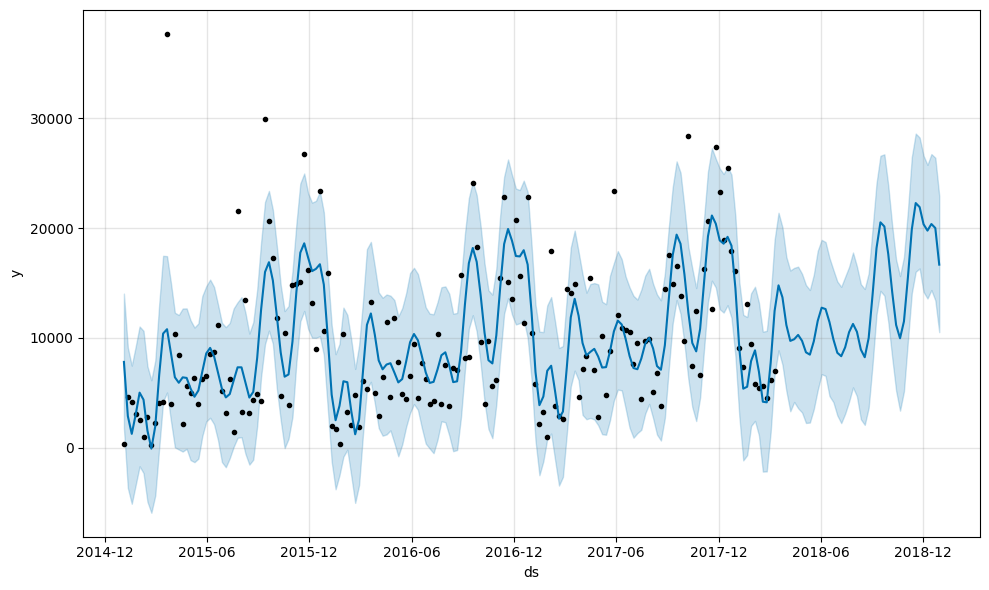

In [ ]:
import pandas as pd
from prophet import Prophet

# md = td.resample('M', on='Order Date').sum()
# md.reset_index(inplace=True)
# md.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

# # Split the data into training and test sets
# data_train = md.iloc[:-12]
# data_test = md.iloc[-12:]

# # Initialize and fit the Prophet model
# model = Prophet(
#     seasonality_mode = 'additive',
#     seasonality_prior_scale = 10,
#     yearly_seasonality=True)
# model.fit(data_train)

# Forecasting weekly using Prophet
td.set_index('Order Date', inplace=True)
weekly_data = td.resample('W').sum()
weekly_data.reset_index(inplace=True)
weekly_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

# Split the data into training and test sets
train_size = int(len(weekly_data) * 0.8)
data_train = weekly_data.iloc[:train_size]
data_test = weekly_data.iloc[train_size:]

# Initialize and fit the Prophet model
model = Prophet(
    seasonality_mode='additive',
    seasonality_prior_scale=10,
    yearly_seasonality=True
)
model.fit(data_train)
# Make a future dataframe that includes the test period
future = model.make_future_dataframe(periods=len(data_test), freq='W')

# Forecast the data
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)





# prophet_df = td[['Order Date', 'Sales']].copy()
# prophet_df.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

# # Split the data into training and test sets
# train_size2 = int(len(prophet_df) * 0.8)
# train2 = prophet_df.iloc[:train_size2]
# test2 = prophet_df.iloc[train_size2:]

# # Initialize the model
# model = Prophet()

# # Fit the model
# model.fit(prophet_df)

# # Make a future dataframe
# future = model.make_future_dataframe(periods=len(test2))

# # Forecast the data
# forecast = model.predict(future)

# # Plot the forecast
# fig = model.plot(forecast)

In [ ]:
# Extract the forecasted values corresponding to the test period
forecast_test = forecast.iloc[-len(data_test):]

# Calculate MAPE
y_true = data_test['y'].values  # Actual values
y_pred = forecast_test['yhat'].values  # Forecasted values

# Handle division by zero in MAPE calculation
with np.errstate(divide='ignore', invalid='ignore'):
    absolute_percentage_errors = np.abs((y_true - y_pred) / y_true) * 100
    absolute_percentage_errors = absolute_percentage_errors[~np.isnan(absolute_percentage_errors)]  # Remove NaN values
    mape = np.mean(absolute_percentage_errors)

print(f'MAPE: {mape:.2f}%')

# # Plot the forecast
# fig = model.plot(forecast)

MAPE: 40.01%


In [ ]:
result = adfuller(td['Sales'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -98.915879
p-value: 0.000000


In [ ]:

# List of boolean column names
boolean_columns = ['FUR', 'OFF', 'TEC','First Class','Same Day','Second Class','Standard Class','Furniture','Office Supplies','Technology','Central','East','South','West','Consumer','Corporate','Home Office','CA','US','Accessories','Appliances','Art','Binders','Bookcases','Chairs','Copiers','Envelopes','Fasteners','Furnishings','Labels','Machines','Paper','Phones','Storage','Supplies','Tables']  # Add all boolean column names here

# Convert boolean columns to 0s and 1s
td[boolean_columns] = td[boolean_columns].astype(int)

td



,Sales,FUR,OFF,TEC,First Class,Same Day,Second Class,Standard Class,Furniture,Office Supplies,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Order Date,,,,,,,,,,,,,,,,,,,,,
2015-01-03,16.448,0,1,0,0,0,0,1,0,1,...,False,False,False,True,False,False,False,False,False,False
2015-01-04,3.540,0,1,0,0,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
2015-01-04,272.736,0,1,0,0,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
2015-01-04,11.784,0,1,0,0,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
2015-01-05,19.536,0,1,0,0,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30,323.136,1,0,0,0,0,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
2018-12-30,52.776,0,1,0,0,0,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
2018-12-30,90.930,0,0,1,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
model = ARIMA(td['Sales'], order=(1,0,1))

model_fit = model.fit()

predictions = model_fit.forecast(steps=5)  # Predict next 5 points

print(predictions)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

9789    230.097428
9790    230.116192
9791    230.116193
9792    230.116193
9793    230.116193
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


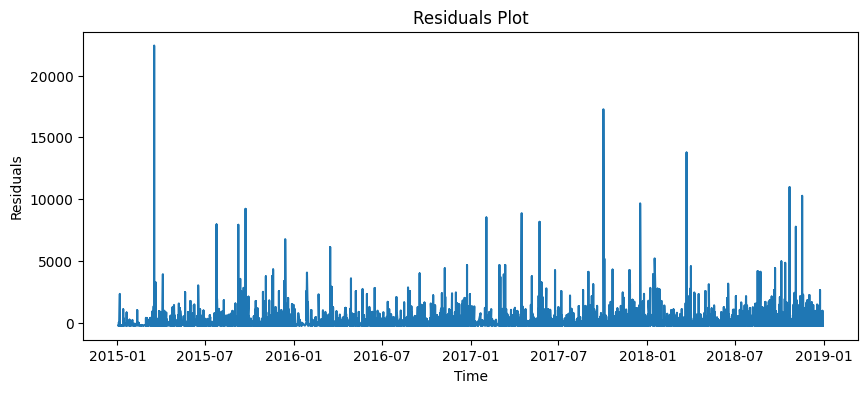

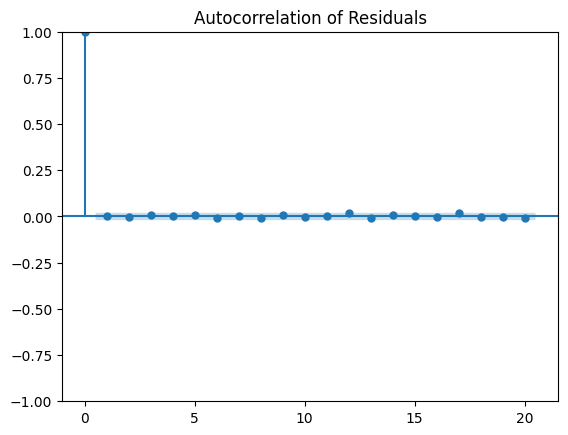

In [ ]:
# Get model residuals
residuals = model_fit.resid

# Plot residuals over time to check for patterns
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Alternatively, use autocorrelation function (ACF) plot of residuals
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags=20)
plt.title('Autocorrelation of Residuals')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Example: Actual and predicted values
actual_values = td['Sales']
y_true = actual_values  # Replace with your actual values
y_pred = model_fit.forecast(steps=len(actual_values))  # Forecasted values

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error (MSE): 390962.75
Mean Absolute Error (MAE): 268.47


In [ ]:
# import pandas as pd
# import numpy as np

# # Assuming prophet_df contains your dataframe with 'Order Date' and 'Sales' columns
# prophet_df = td[['Order Date', 'Sales']].copy()
# prophet_df.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

# # Calculate the third quartile (Q3)
# Q3 = prophet_df['y'].quantile(0.75)

# # Filter out rows where Sales exceed Q3 (i.e., remove the last quartile)
# prophet_df_filtered = prophet_df[prophet_df['y'] <= Q3]

# # Verify the filtered dataframe
# print(f"Original dataframe shape: {prophet_df.shape}")
# print(f"Filtered dataframe shape: {prophet_df_filtered.shape}")

# # Optionally, continue with your Prophet modeling or analysis using prophet_df_filtered

In [ ]:
# # Columns to be used for regression
# # features = ['Year', 'Month', 'Day', 'DayOfWeek', 'OrderDateOrdinal', 'IsWeekend','FUR','OFF','TEC','First Class','Same Day','Second Class','Standard Class','Furniture','Office Supplies','Technology','Central','East','South','West','Consumer','Corporate','Home Office','CA','US','IsWeekend','Ship-Year','Ship-Month','Ship-Day','ShipDateOrdinal']
# X1 = td[['FUR','OFF','TEC','First Class','Same Day','Second Class','Standard Class','Furniture','Office Supplies','Technology','Central','East','South','West','Consumer','Corporate','Home Office','CA','US','OrderDateOrdinal','ShipDateOrdinal','Accessories','Appliances','Art','Binders','Bookcases','Chairs','Copiers','Envelopes','Fasteners','Furnishings','Labels','Machines','Paper','Phones','Storage','Supplies','Tables']]
# y1 = td['Sales']

# # Split the data into training and testing sets
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# # Create a linear regression model
# model1 = LinearRegression()

# # Train the model
# model1.fit(X_train1, y_train1)

# # Predict on the test set
# y_pred1 = model1.predict(X_test1)

# # Evaluate the model
# mse = mean_squared_error(y_test1, y_pred1)
# print("Mean Squared Error:", mse)
# r2 = r2_score(y_test1, y_pred1)
# print("R-squared:", r2)

Mean Squared Error: 0.0005751982806395751
R-squared: 0.27722756710971075


In [ ]:
# r2 = r2_score(y_test1, y_pred1)
# print("R-squared:", r2)

R-squared: 0.27722756710971075


<Axes: >

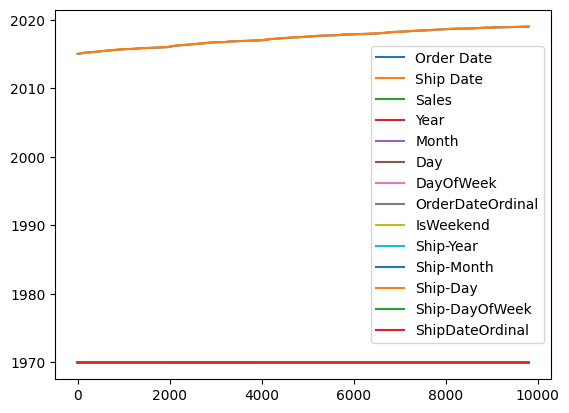

In [ ]:
# td.plot()

XGBoost Model

In [ ]:
# td.set_index('Order Date', inplace=True)

In [ ]:
def create_features(df, lags):
    # Compute rolling statistics
    df['rolling_mean_3'] = df['Sales'].rolling(window=3).mean()
    df['rolling_std_3'] = df['Sales'].rolling(window=3).std()

    # Create lag features
    for lag in lags:
        df[f'Sales_lag_{lag}'] = df['Sales'].shift(lag)

    # Extract datetime features
    df['day_of_week'] = df.index.dayofweek

    # Drop rows with NaN values resulting from rolling and lag operations
    df.dropna(inplace=True)

    return df

td = create_features(td, lags=[1, 2, 3])


In [ ]:
train_size = int(len(td) * 0.8)
train, test = td[:train_size], td[train_size:]

X_train, y_train = train.drop(columns=['Sales']), train['Sales']
X_test, y_test = test.drop(columns=['Sales']), test['Sales']


In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MAE: 32.6064724744333
RMSE: 159.12309860486573


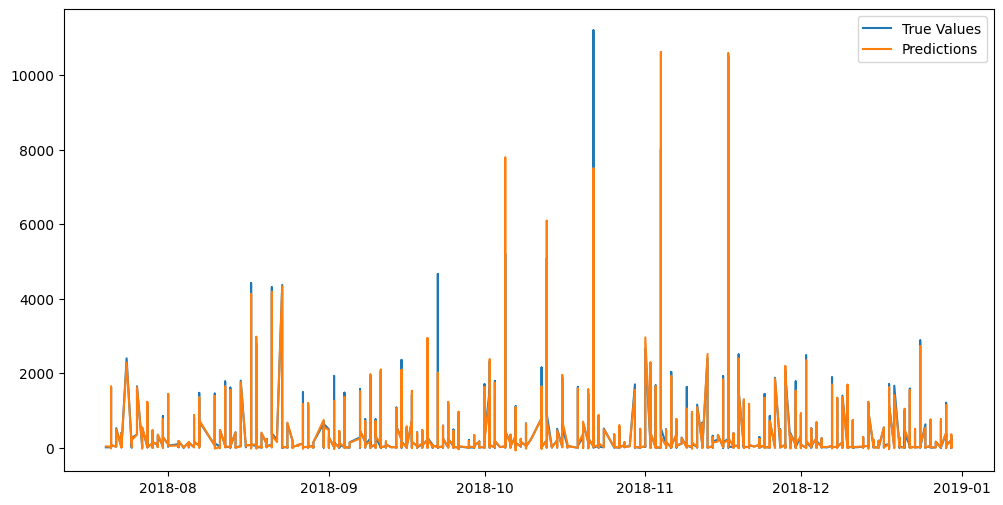

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='True Values')
plt.plot(test.index, predictions, label='Predictions')
plt.legend()
plt.show()


In [ ]:

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    nonzero_indices = y_true != 0
    y_true = y_true[nonzero_indices]
    y_pred = y_pred[nonzero_indices]
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

# Example: Assuming y_test and y_pred are defined
# Convert y_test to a numpy array if it's a pandas Series
y_test_array = y_test.values if isinstance(y_test, pd.Series) else y_test

# Generate predictions
y_pred = model.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_array, y_pred)
print(f'MAPE: {mape:.2f}%')


MAPE: 66.85%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

# Resample data to weekly frequency and sum sales
weekly_data = td.resample('W').sum()
weekly_data.reset_index(inplace=True)

# Create features for the model
weekly_data['weekofyear'] = weekly_data['Order Date'].dt.isocalendar().week
weekly_data['month'] = weekly_data['Order Date'].dt.month
weekly_data['quarter'] = weekly_data['Order Date'].dt.quarter
weekly_data['year'] = weekly_data['Order Date'].dt.year

# Define the features and target
X = weekly_data[['weekofyear', 'month', 'quarter', 'year']]
y = weekly_data['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = XGBRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Mean Absolute Percentage Error (MAPE): 0.98%


So, we achieved a MAPE of 0.98%. Hence, the model is working pretty well.

Machine Learning Approaches - LSTM

In [ ]:
td.reset_index(inplace=True)

Order Date          datetime64[ns]
Sales                      float64
FUR                          int64
OFF                          int64
TEC                          int64
First Class                  int64
Same Day                     int64
Second Class                 int64
Standard Class               int64
Furniture                    int64
Office Supplies              int64
Technology                   int64
Central                      int64
East                         int64
South                        int64
West                         int64
Consumer                     int64
Corporate                    int64
Home Office                  int64
CA                           int64
US                           int64
Year                       float64
Month                      float64
Day                        float64
DayOfWeek                  float64
OrderDateOrdinal           float64
IsWeekend                  float64
Ship-Year                  float64
Ship-Month          

In [ ]:
import pandas as pd
import numpy as np

# Assuming weekly_data is your DataFrame with 'Sales' and 'Order Date'
weekly_data['Sales'] = weekly_data['Sales'].values

# Normalize the sales data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_sales = scaler.fit_transform(weekly_data[['Sales']])

# Create sequences for LSTM
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set time steps
time_steps = 4  # For example, using the last 4 weeks to predict the next
X, y = create_sequences(scaled_sales, time_steps)

# Reshape for LSTM: (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
6/6 [==============================] - 6s 14ms/step - loss: 0.1041
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0614
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0377
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0387
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0367
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0359
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0353
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0364
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0346
Epoch 10/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0347
Epoch 11/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0342
Epoch 12/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0359
Epoch 13/100
6/6 [==============================] - 0s 9ms/

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Inverse transform to get actual sales
y_pred_rescaled = scaler.inverse_transform(y_pred)

2/2 [==============================] - 1s 7ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test.reshape(-1, 1)), y_pred_rescaled)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 0.46%


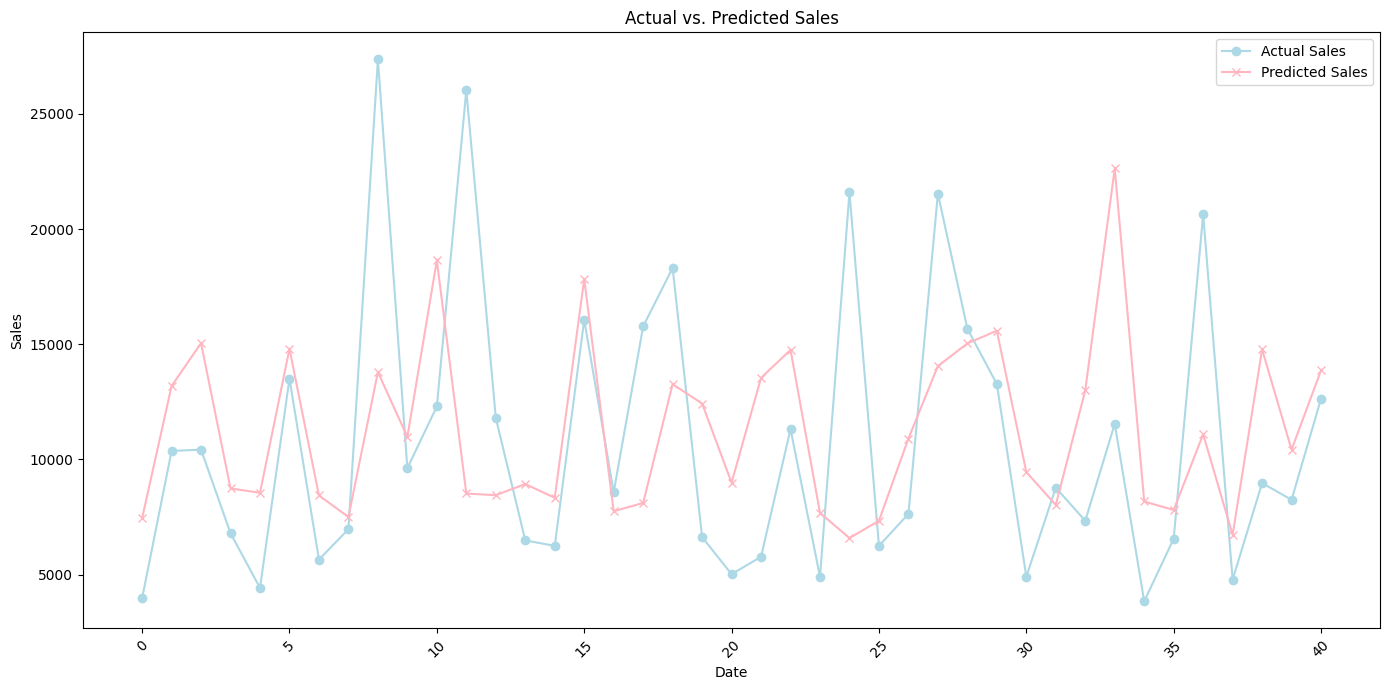

In [ ]:
import matplotlib.pyplot as plt

# Combine results
results = pd.DataFrame({'Actual': scaler.inverse_transform(y_test.reshape(-1, 1)).flatten(),
                        'Predicted': y_pred_rescaled.flatten()})

plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Actual'], label='Actual Sales', color='lightblue', marker='o')
plt.plot(results.index, results['Predicted'], label='Predicted Sales', color='lightpink', marker='x')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()